In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
corr2 = pd.read_csv('corr2.txt', index_col=0)

In [27]:
politics = ['leftright', # 0=strong Dem, 6 = strong Rep
            'politicalinterest', # 0 = not at all interested, 3= v interested
            'politicalparticipation', # 0 = no protest or petition, 1 = one activity, 2 = both activities
           ]

personality = [
               'TIPI_extraversion',
               'TIPI_agreeableness', 
               'TIPI_conscientiousness',
               'TIPI_emotionalstability', 
               'TIPI_openness'
              ]

demographics = ['age', 
                'female', 
                'education']

# to be calculated for each text q
stats = ['clustering',
         'giant component',
         'disssortativity',
         'k avg',
         'k std',
         'entropy',
         'density']

In [28]:
def get_sorted_corr(corr, col_order = list(), row_order = list()):

    # column order
    if not col_order:
        sq = corr.T.dot(corr)
        val, vec = np.linalg.eig(sq)

        # find largest eigenvalue
        index = np.where(val == max(val))[0][0]

        # return largest eigenvector as strength
        vector = vec.T[index]

        order_dict = dict((j,i) for i, j in enumerate(vector))
        newcols = [i for j, i in sorted(order_dict.items())]

        cols = corr.columns.tolist()
        col_order = [cols[i] for i in newcols]

    # row order
    if not row_order:
        sq = corr.dot(corr.T)
        val, vec = np.linalg.eig(sq)

        # find largest eigenvalue
        index = np.where(val == max(val))[0][0]

        # return largest eigenvector as strength
        vector = vec.T[index]

        order_dict = dict((j,i) for i, j in enumerate(vector))
        newrows = [i for j, i in sorted(order_dict.items())]

        rows = corr.index.tolist()
        row_order = [rows[i] for i in newrows][::-1]

    sorted_corr = corr[col_order].reindex(row_order)

    return sorted_corr

In [41]:
sorted_corr = get_sorted_corr(corr2)

In [35]:
corr2 = corr2.rename(columns={'leftright': 'Party ID (R)',
                            'politicalinterest': 'Pol. Interest',
                            'politicalparticipation': 'Pol. Participation',
                            'TIPI_extraversion' : 'Extraversion',
                            'TIPI_agreeableness': 'Agreeableness', 
                            'TIPI_conscientiousness': 'Conscientiousness',
                            'TIPI_emotionalstability': 'Emotional Stability', 
                            'TIPI_openness': 'Openness',
                            'age': 'Age',
                            'female': 'Gender (M)',
                            'education': 'Education'
                           })

/var/folders/y5/0zshhm0j5l514kgyjk0t9lb00000gq/T/ipykernel_79737/1775273668.py:7: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax1.get_shared_y_axes().join(ax2)


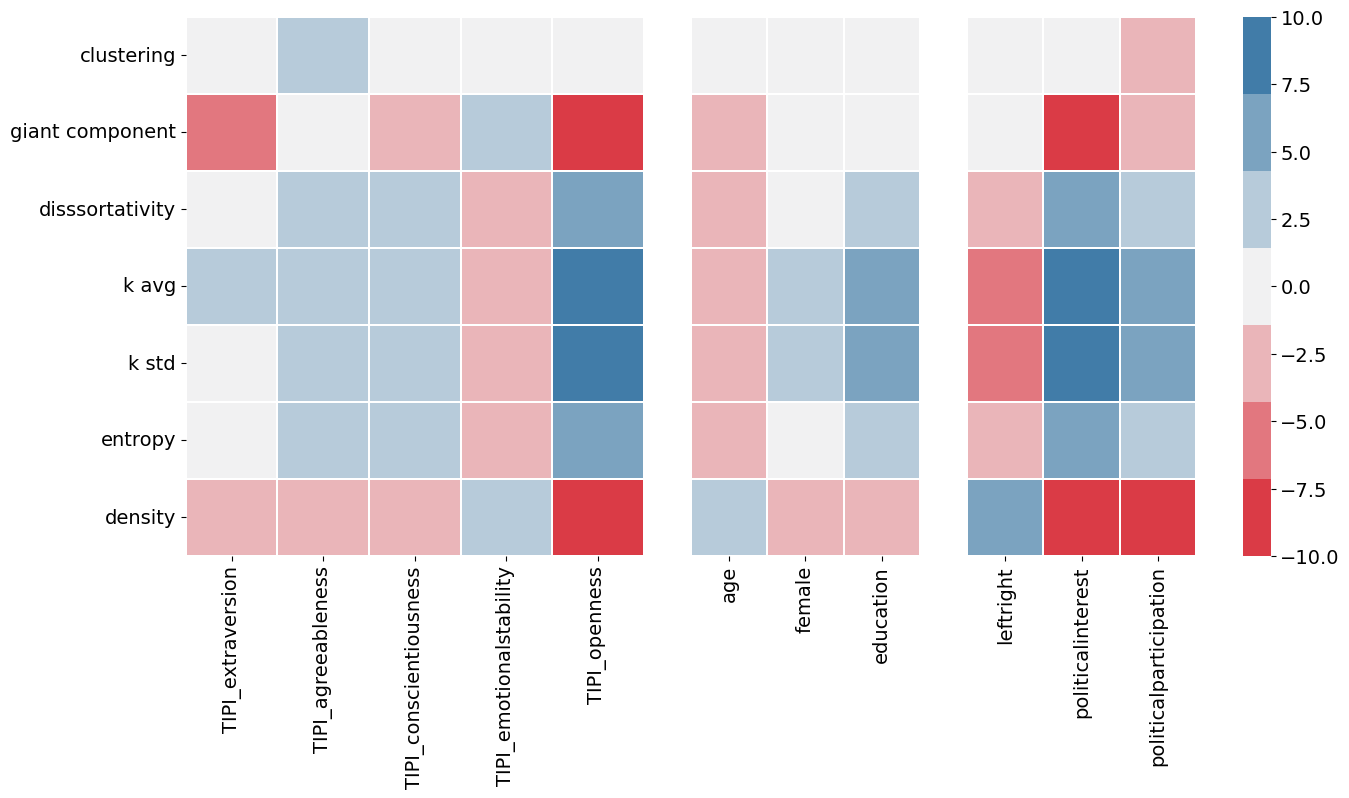

In [49]:
plt.rcParams.update({'font.size': 14})

f, (ax1, ax2, ax3, axcb) = plt.subplots(1, 4,
            gridspec_kw={'width_ratios':[1,.5, .5, 0.06]},
                               figsize=(14, 7))

ax1.get_shared_y_axes().join(ax2)


g1 = sns.heatmap(corr2[personality],
            vmin=-10, vmax=10,
            cmap=sns.diverging_palette(h_neg=10, h_pos=240, n=7, as_cmap=False, center='light'),
            ax=ax1, linewidths=.01, cbar=False)

g1.set_ylabel('')
g1.set_xlabel('')

g2 = sns.heatmap(corr2[demographics],
            vmin=-10, vmax=10,
            cmap=sns.diverging_palette(h_neg=10, h_pos=240, n=7, as_cmap=False, center='light'),
            ax=ax2, linewidths=.25, cbar=False)

g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])


g3 = sns.heatmap(corr2[politics],
            vmin=-10, vmax=10,
            cmap=sns.diverging_palette(h_neg=10, h_pos=240, n=7, as_cmap=False, center='light'),
            ax=ax3, linewidths=.25, cbar_ax=axcb)

g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1, g2, g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)



In [43]:
sorted_corr

,leftright,TIPI_emotionalstability,age,TIPI_extraversion,female,TIPI_conscientiousness,TIPI_agreeableness,education,politicalparticipation,TIPI_openness,politicalinterest
k std,-5.092588,-2.187487,-2.417656,1.413710,2.461708,2.571459,3.505438,4.563990,5.611802,9.003738,9.839123
k avg,-5.432994,-1.697912,-3.462351,1.513900,1.476163,2.786866,3.537577,6.564950,5.539519,8.615117,8.398177
disssortativity,-3.285174,-2.171296,-1.965638,-0.780461,0.758563,2.089460,2.583104,2.532952,2.870927,5.061006,5.591299
entropy,-3.696957,-2.423827,-2.051201,-1.404655,1.247105,2.155963,2.864590,2.898816,2.866195,4.474926,5.274392
clustering,0.763257,-1.188427,0.454677,0.803076,0.570603,0.394748,1.984451,-0.904140,-1.739060,0.591384,-0.042712
giant component,-0.771599,2.336227,-2.440410,-4.337047,-1.257808,-1.517566,-0.348806,0.720805,-2.758296,-7.335350,-8.546909
density,4.499365,3.057490,1.853349,-2.676251,-3.072373,-3.117432,-3.590643,-3.947613,-7.206150,-10.660232,-12.019007
